In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score,r2_score
from sklearn.preprocessing import PolynomialFeatures,OneHotEncoder,StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,VotingRegressor,GradientBoostingRegressor,AdaBoostRegressor,HistGradientBoostingRegressor,StackingRegressor
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('Train.csv',delimiter=',')

# Exporing dataset

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
for columns in data.columns:
    if data[columns].dtype=='object':
        print(f"vales from the column :{columns}")
        print(data[columns].value_counts())
        print("-"*50)

vales from the column :Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64
--------------------------------------------------
vales from the column :Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
--------------------------------------------------
vales from the column :Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood        

In [ ]:
data.select_dtypes(include=['object']).columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


# Filling the null values by using SimpleImputer and pandas fillna

In [ ]:
imputer=SimpleImputer(strategy='median')
data['Item_Weight']=imputer.fit_transform(data[['Item_Weight']])

In [ ]:
most_frequent = data['Outlet_Size'].mode()[0]
data['Outlet_Size'].fillna(most_frequent, inplace=True)

In [ ]:
data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


# Feature Engineering

In [ ]:
#There is same feature with different name low_fat and Low_fat in Item_Fat_Content column so i am mearing them
data['Item_Fat_Content'].replace({'low fat':'Low Fat','reg':'Regular'},inplace=True)

In [ ]:
data['Outlet_Size'].replace({'Small':0,'Medium':1,'High':2},inplace=True)

In [ ]:
encoder=LabelEncoder()
columns=data.select_dtypes(include=['object']).columns
if 'Outlet_Size' in columns:
    columns = columns.drop('Outlet_Size')
for column in columns:
    data[column]=encoder.fit_transform(data[column])

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,2,2,1,994.7052


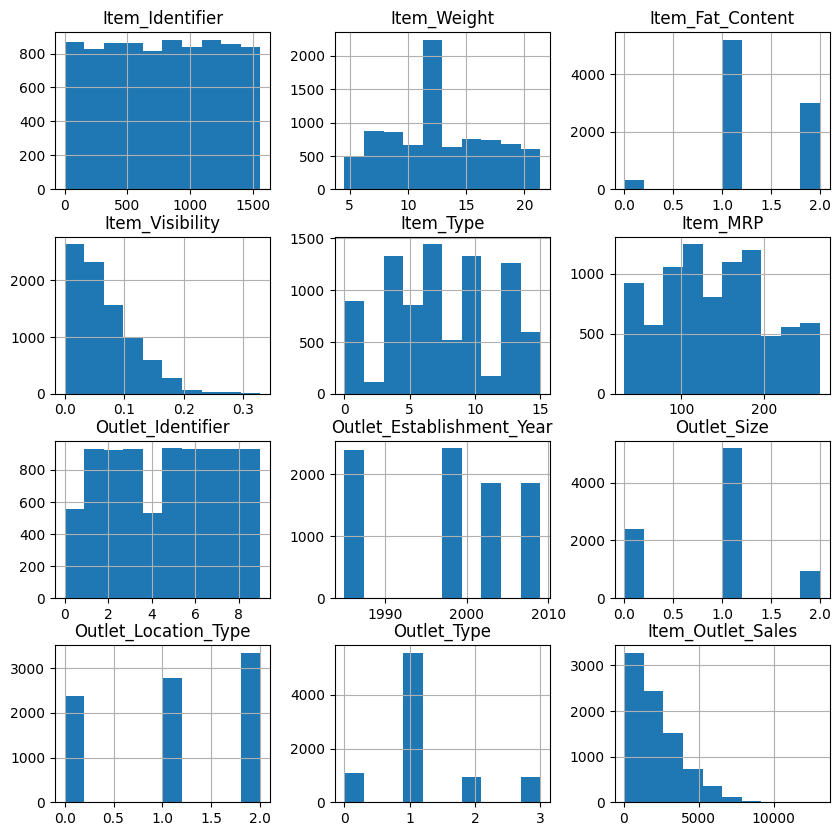

In [ ]:
data.hist(figsize=(10,10))
plt.show()

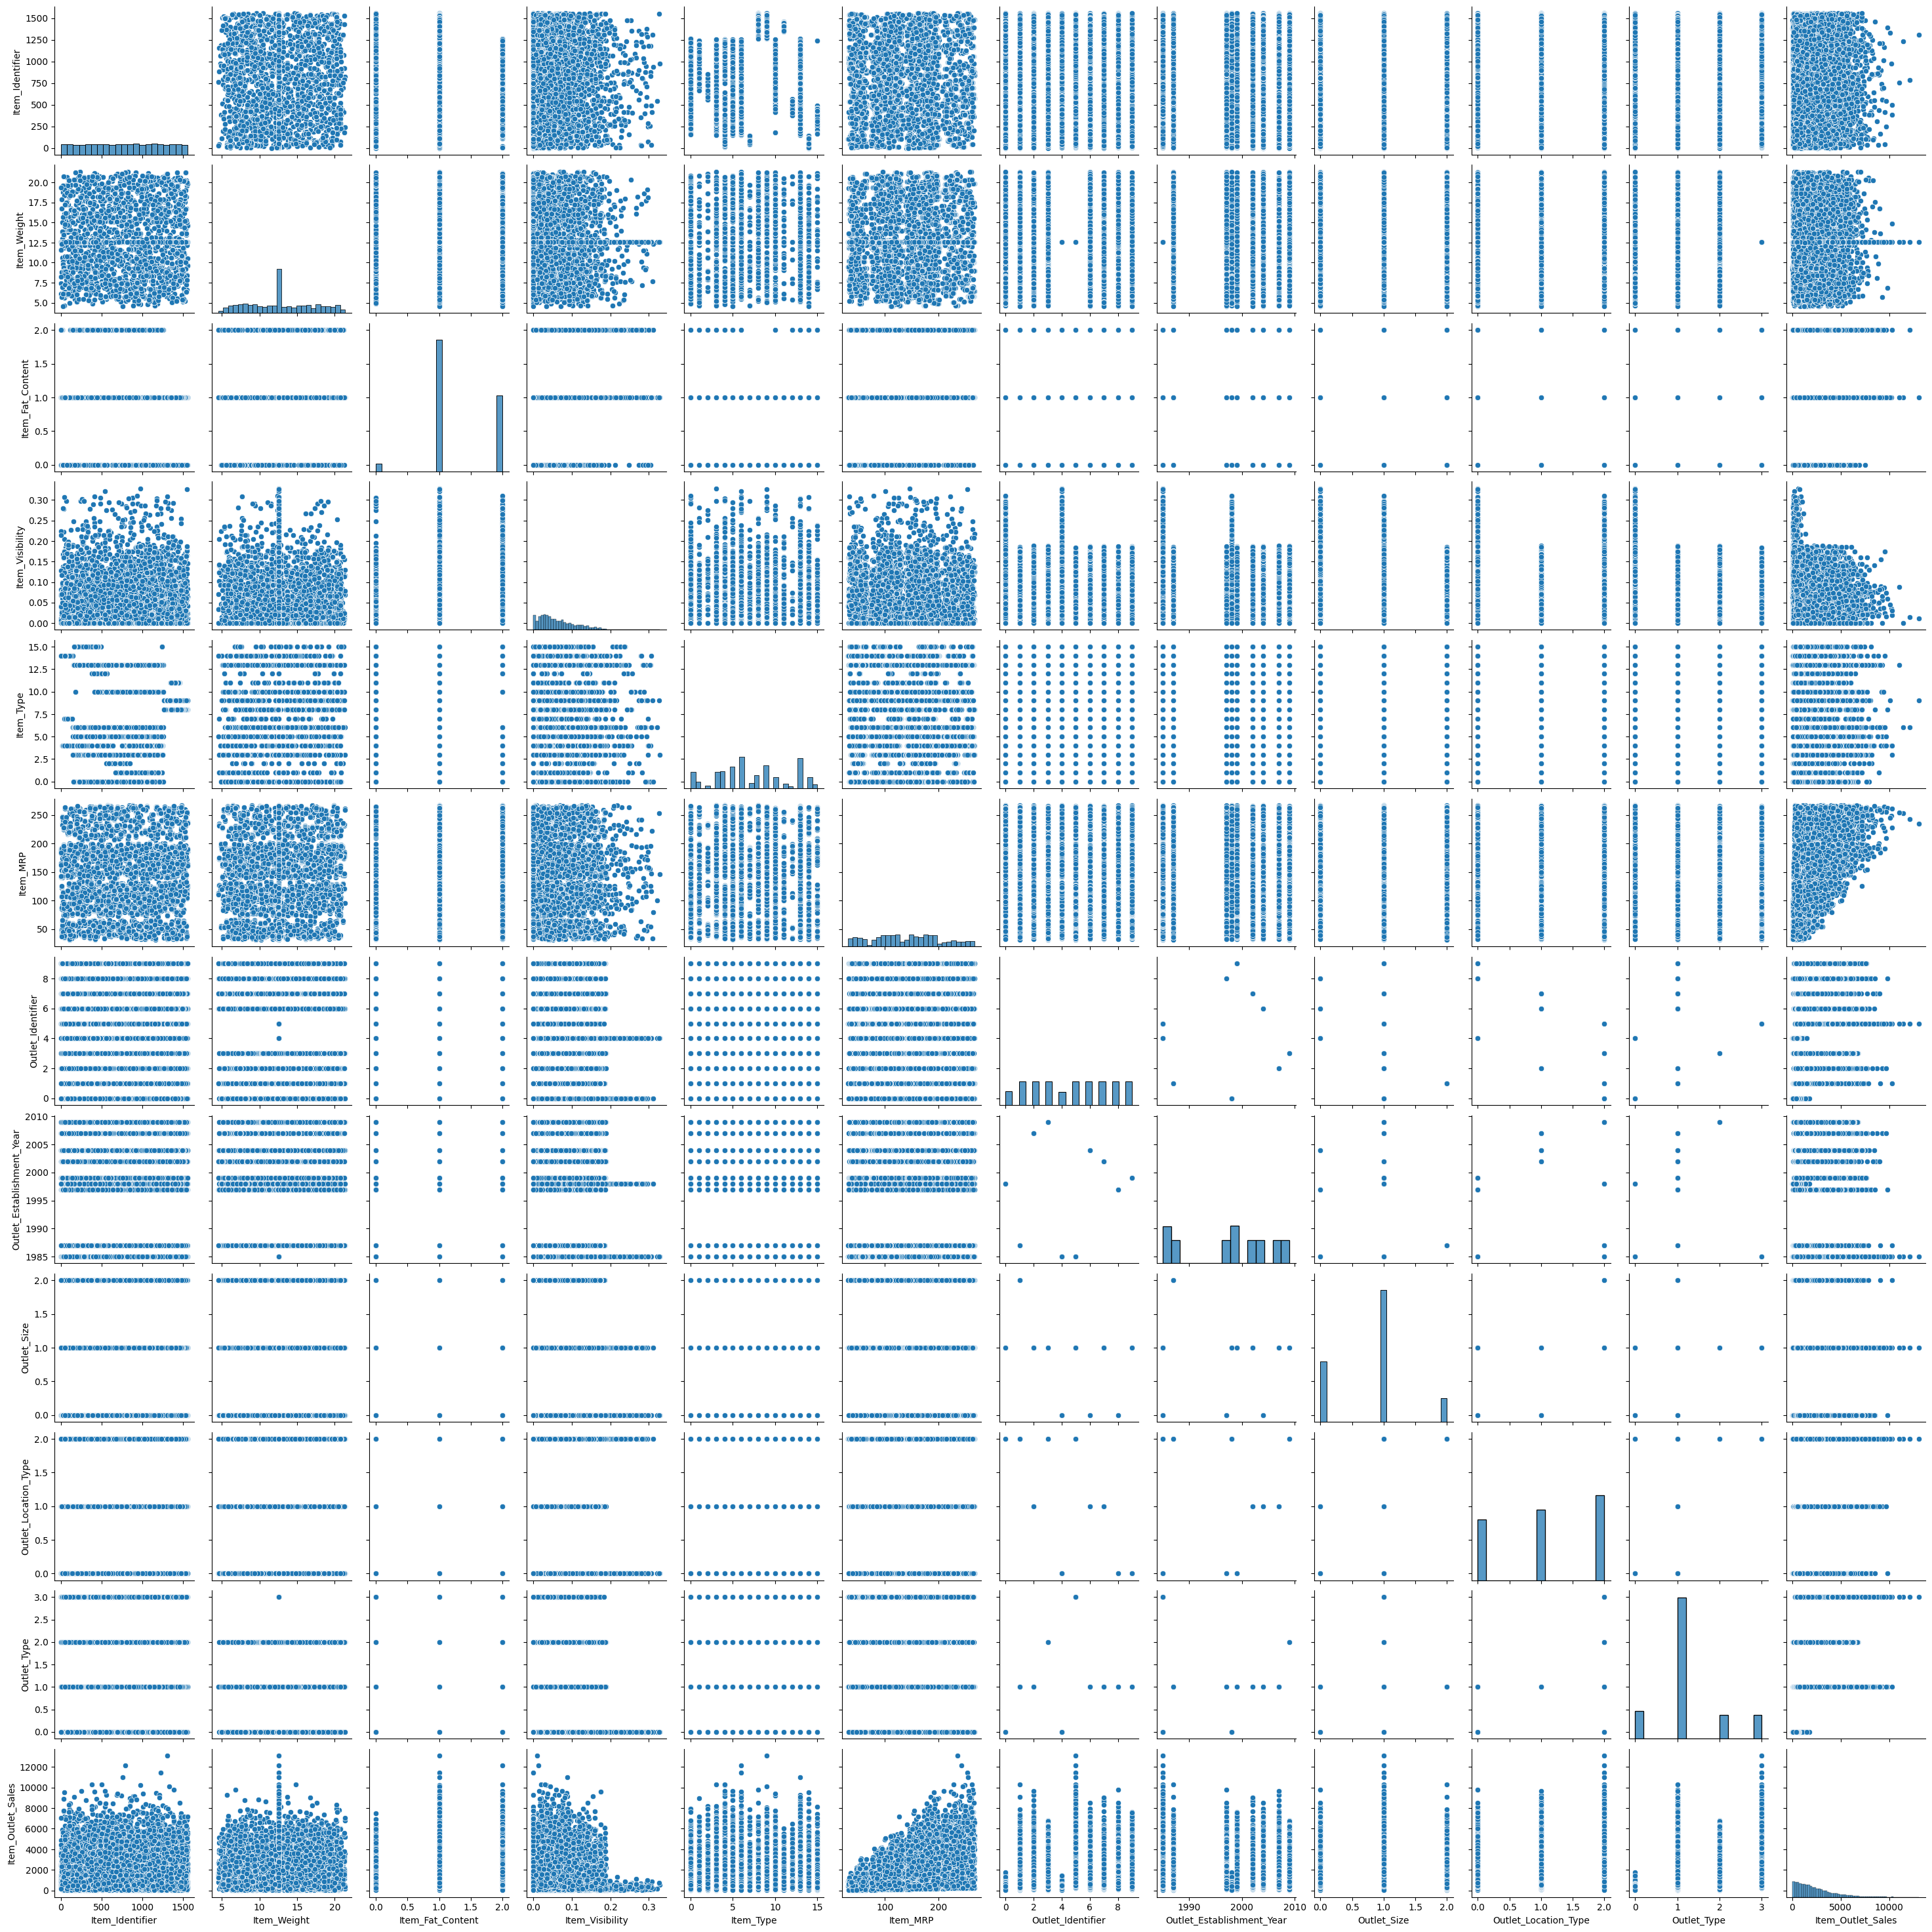

In [ ]:
sns.pairplot(data)

<Axes: >

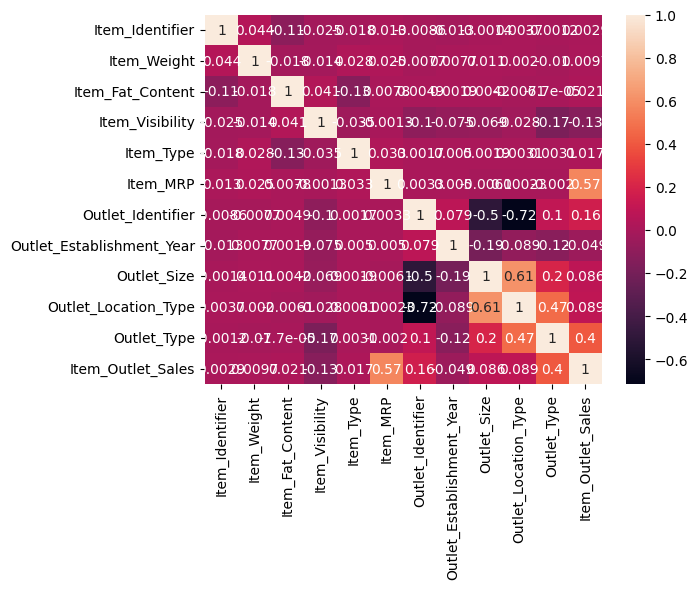

In [ ]:
numarical_data=data.select_dtypes(include=np.number)
sns.heatmap(numarical_data.corr(),annot=True)

Text(0.5, 1.0, 'Sale Price vs Outlet Establishment Year')

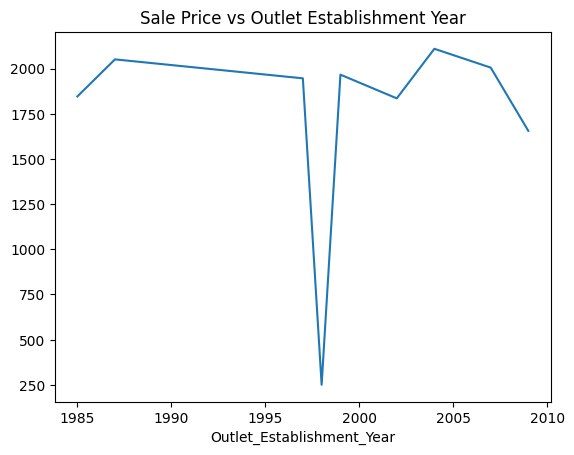

In [ ]:
data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].median().plot()
plt.title('Sale Price vs Outlet Establishment Year')

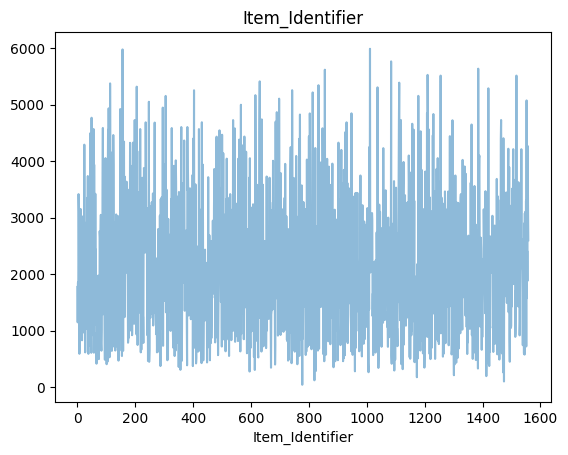

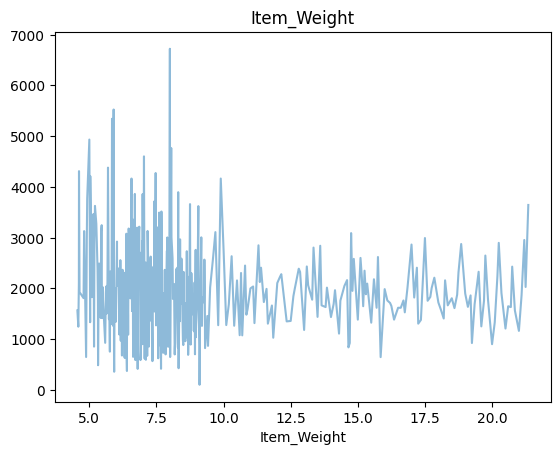

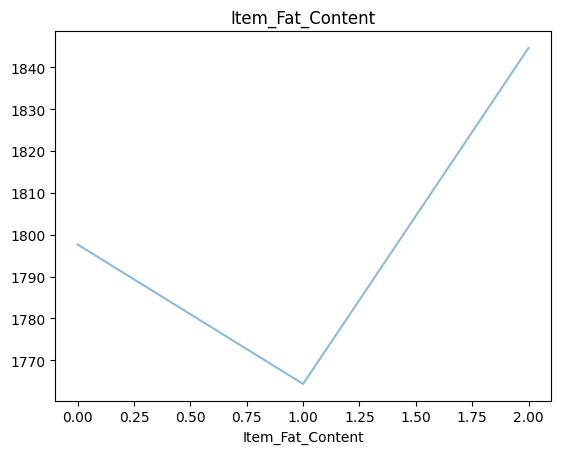

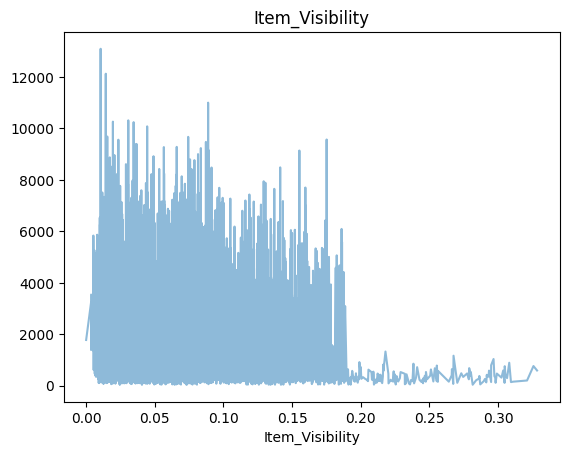

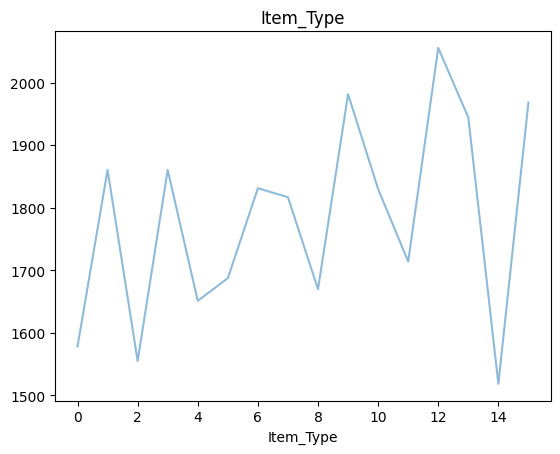

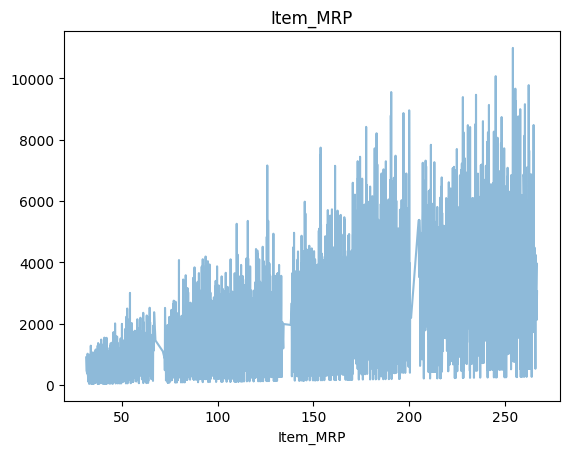

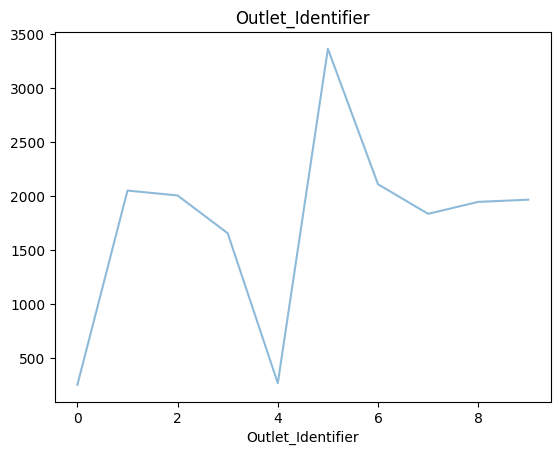

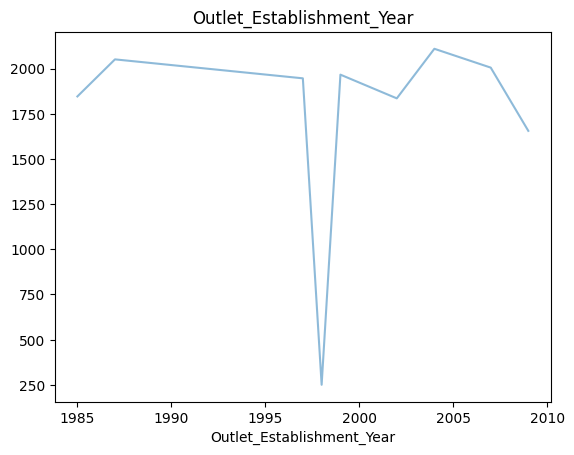

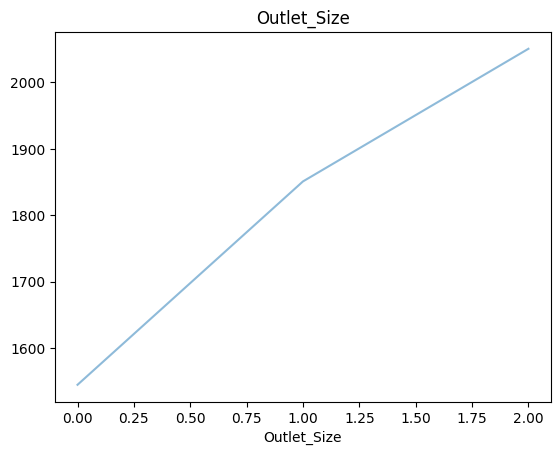

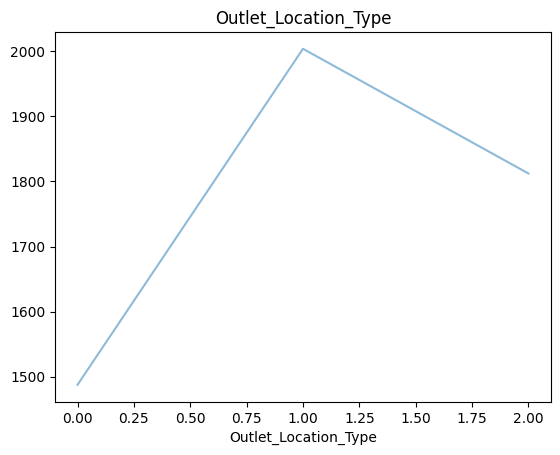

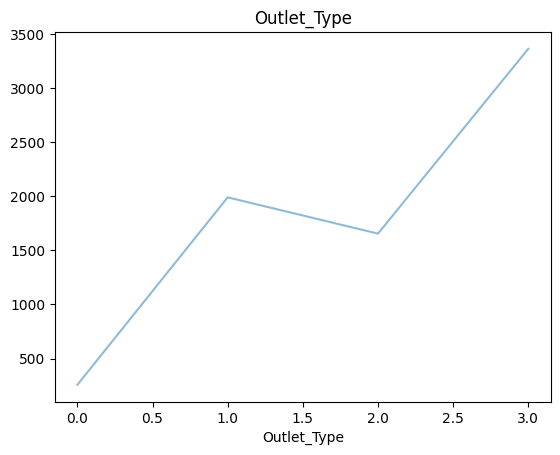

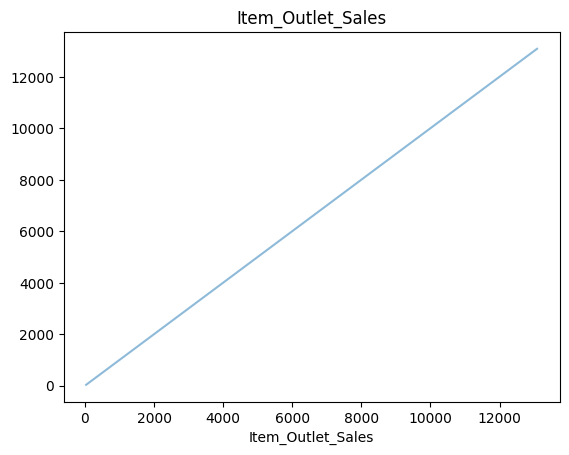

In [ ]:
for feature in data.columns:
    data.groupby(feature)['Item_Outlet_Sales'].median().plot(alpha=0.5)
    plt.title(feature)
    plt.show()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(data.drop('Item_Outlet_Sales',axis=1),data['Item_Outlet_Sales'],test_size=0.2,random_state=42)

In [ ]:
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [ ]:
reg=RandomForestRegressor()
lig=LinearRegression()
gbr=GradientBoostingRegressor()
adr=AdaBoostRegressor()
voting=VotingRegressor([('reg',reg),('lig',lig),('gbr',gbr),('adr',adr)])

In [ ]:
reg.fit(X_train,y_train)
y_pred4=reg.predict(X_test)

In [ ]:
r2_score(y_test,y_pred4)

0.558231481260614

In [ ]:
voting.fit(X_train,y_train)

VotingRegressor(estimators=[('reg', RandomForestRegressor()),
                            ('lig', LinearRegression()),
                            ('gbr', GradientBoostingRegressor()),
                            ('adr', AdaBoostRegressor())])

In [ ]:
y_pred=voting.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_pred)

1098137.9044965284

In [ ]:
r2_score(y_test,y_pred)

0.5959713030013352

In [ ]:
gbrt_best = GradientBoostingRegressor(
max_depth=2, learning_rate=0.05, n_estimators=500,
n_iter_no_change=10, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=500,
                          n_iter_no_change=10, random_state=42)

In [ ]:
y_pred1=gbrt_best.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_pred1)

1047848.1467271282

In [ ]:
r2_score(y_test,y_pred1)

0.614473993074004

In [ ]:
hgb_reg = HistGradientBoostingRegressor(max_iter=100, learning_rate=0.05, random_state=42)
hgb_reg.fit(X_train, y_train)

HistGradientBoostingRegressor(learning_rate=0.05, random_state=42)

In [ ]:
y_pred2=hgb_reg.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_pred2)

1086081.2271905725

In [ ]:
r2_score(y_test,y_pred2)

0.6004072154692617

In [ ]:
stack=StackingRegressor(estimators=[('reg',reg),('lig',lig),('gbr',gbr),('adr',adr)])
stack.fit(X_train,y_train)

StackingRegressor(estimators=[('reg', RandomForestRegressor()),
                              ('lig', LinearRegression()),
                              ('gbr', GradientBoostingRegressor()),
                              ('adr', AdaBoostRegressor())])

In [ ]:
y_pred3=stack.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_pred3)

1073883.3264134924

In [ ]:
r2_score(y_test,y_pred3)*100

60.48950871080629